In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analysis Project — Telco Customer Churn
Motivation and aim for this project: To analyze the dataset and to make actionable insights to retain customers 
and increase customers’ lifetime values

In [222]:
####Part 0: Imports the libraries for data loading,visualizition
####Reading data using pandas 
###Count number of rows, columns
### Using DataFrame.head() to get first 5 rows of DataFrame
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns 
import plotly.express as px


In [223]:
df = pd.read_csv('/content/drive/MyDrive/DSEB_61/miterm/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [224]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Description of this dataset 
The data set includes information about: 21 columns (features) and 7043 rows (customers). Each row represents a customer, each column contains customer’s attribute. The target variable is 'Churn'. 

# PART 1: QUICK DATA CHECK

In [225]:
##Check data types using info() function 
df.info()
## What problem have you observed? -> fix it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We see "TotalCharges" columns is types 'object'. But actually it should be of type float. So we are converting Total Charges to a numerical data type.

In [226]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')


In [227]:
##Check statistical information using describe()
df.describe()
##Make some conclusions 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [228]:
###Check for null values in our data and decide how to handle null-value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values for Total Charges. I will remove these 11 rows from our dataset. 

In [229]:
df.dropna(inplace = True)

# PART 2: Exploratory Data Analysis

In [230]:
###Check the balance of class label using value_counts()
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [231]:
def visualaize_percentage(columns):
  plt.figure(figsize= (10,10))
  df_g = df.groupby([columns, 'Churn']).size().reset_index()
  df_g['percentage'] = df.groupby([columns, 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

  df_g.columns = [columns, 'Churn', 'count', '%']

  fig = px.bar(df_g, x=columns, y=['count'], color='Churn', text=df_g['%'].apply(lambda x: '{0:1.2f}%'.format(x)),
        width=500, height=500)
  fig.show(renderer="colab")

In [232]:
###Create a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), 
###showing the percentage of Churn for each category of the attribute

###Draw a conclusion

In [233]:
visualaize_percentage('gender')

<Figure size 720x720 with 0 Axes>

The variable "gender" does not have much effect on the target variable. The number of male and female customers is roughly equal, and the percentage of customers that will leave the company is also approximately the same.

In [234]:
visualaize_percentage('Dependents')

<Figure size 720x720 with 0 Axes>

Non-dependent customers have approximately twice the number of dependent customers. In which, the number of dependent customers who agreed to stay with the company last month accounted for 84.47% of all dependent customers. But the number of independent customers who agree to stay only accounts for 68.7% of all non-dependent customers.

In [235]:
visualaize_percentage('Partner')

<Figure size 720x720 with 0 Axes>

The number of customers with a partner is only a small amount less than the number of customers without a partnership. But the number of customers with partners tend to stay at the company last month higher than customers without partners.

In [236]:
visualaize_percentage('SeniorCitizen')

<Figure size 720x720 with 0 Axes>

Customers who are not senior citizens make up the majority of the data set, and those customers are also much more likely to agree to stay with the company than senior citizens.

In [237]:
###Create a stacked percentage bar chart for each category of the customer account attributes 
###(Contract, PaperlessBilling, PaymentMethod).

###Draw a conclusion

In [238]:
visualaize_percentage('Contract')

<Figure size 720x720 with 0 Axes>

In [239]:
plt.figure(figsize= (10,10))
df_g = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index()
df_g['percentage'] = df.groupby(['PaperlessBilling', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

df_g.columns = ['PaperlessBilling', 'Churn', 'count', '%']

fig = px.bar(df_g, x='PaperlessBilling', y=['count'], color='Churn', text=df_g['%'].apply(lambda x: '{0:1.2f}%'.format(x)),
       width=500, height=500)
fig.show(renderer="colab")
###Draw a conclusion

<Figure size 720x720 with 0 Axes>

In [240]:
plt.figure(figsize= (10,10))
df_g = df.groupby(['PaymentMethod', 'Churn']).size().reset_index()
df_g['percentage'] = df.groupby(['PaymentMethod', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

df_g.columns = ['PaymentMethod', 'Churn', 'count', '%']

fig = px.bar(df_g, x='PaymentMethod', y=['count'], color='Churn', text=df_g['%'].apply(lambda x: '{0:1.2f}%'.format(x)),
       width=500, height=500)
fig.show(renderer="colab")
###Draw a conclusion

<Figure size 720x720 with 0 Axes>

In [241]:
visualaize_percentage('PaymentMethod')

<Figure size 720x720 with 0 Axes>

In [242]:
#### For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests 
###that all of the attributes will be useful to determine whether or not a customer churns.
### Create a plot to show the distribution of tenure, MontlyCharges, TotalCharges by Churn 
churn_yes = df[df['Churn'] == "Yes"].copy()
churn_no = df[df['Churn'] == "No"].copy()
def visualize_distribution(columns):
  plt.figure(figsize=(15,8))
  sns.distplot(churn_yes[columns], label='Yes')
  sns.distplot(churn_no[columns], label='No')
  plt.legend()
  plt.show()
### Draw a conclusion

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



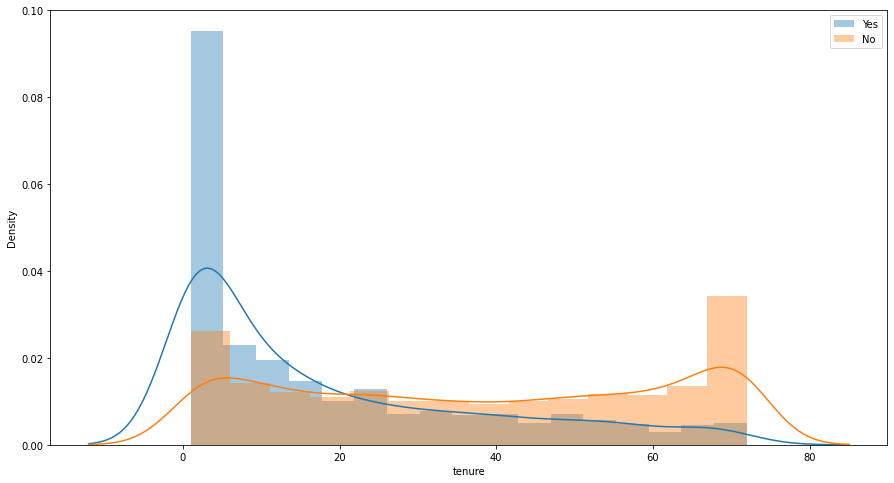

In [243]:
visualize_distribution('tenure')

In [245]:
###evaluate the percentage of the target for each category of the services columns(PhoneService, MultipleLines, InternetService
###,OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV, StreamingMovie) with stacked bar plots
### Draw a conclusion

In [246]:
visualaize_percentage('TechSupport')

<Figure size 720x720 with 0 Axes>

In [247]:
visualaize_percentage('StreamingTV')

<Figure size 720x720 with 0 Axes>

# PART 3: FEATURE ENGINEERING

In [210]:
### Use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, 
###(5)PhoneService , and (6)Churn .
### make a copy of your dataframe
df_transformed = df.copy()
# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for cl in label_encoding_columns:
    if cl == 'gender':
        df_transformed[cl] = df_transformed[cl].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[cl] = df_transformed[cl].map({'Yes': 1, 'No': 0})

In [211]:
### Apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, 
### (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV,
### and (10)StreamingMovies.
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [212]:
### Normalization
### Use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for cl in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[cl].min()
        # maximum value of the column
        max_column = df_transformed[cl].max()
        # min max scaler
        df_transformed[cl] = (df_transformed[cl] - min_column) / (max_column - min_column)   

# PART 4: MODELING

In this project, we compare 3 different algorithms: RandomForest, ANN Model and Gradient Boosting Decision Tree

In [213]:
#train test split: 70% of the sample set for training, 30% for testing 
from sklearn.model_selection import train_test_split
# select independent variables

X = df_transformed.drop(columns= ['Churn','customerID'])

# select dependent variables

y = df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, shuffle=True)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [214]:
## For building ANN models in Python, we are going to use keras package, which
## is a high-level neural networks library. Uncomment the following line to install tensorflow and keras packages
!pip install tensorflow
!pip install keras

In [215]:
###run this cell. This function will return a neural
###network model with one hidden layer. 
### n is the number of features in training dataset 
from keras.models import Sequential
from keras.layers import Dense
def ANN(n):
    model = Sequential()
    model.add(Dense(16, input_dim=n, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
### This function returns a list of algorithms we are going to assess
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''
    ### n: the number of features of X_train
    n= 40
    models = []
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('ANN',ANN(n)))
    return models

# create a list of methods
models = create_models()

In [217]:
models

[('random_forest', RandomForestClassifier(random_state=2)),
 ('gradient_boosting', GradientBoostingClassifier(random_state=2)),
 ('ANN', <keras.engine.sequential.Sequential at 0x7facfcd80d10>)]

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# test different metrics of each model using default hyperparameters
# Create a dictionary named results, this is a dictionary of dictionaries (see the below cell for example)
results = {}
for name, model in models:
    # fit the model with the training data
    if name == 'ANN':
        model.fit(X_train,y_train,epochs = 50, batch_size = 100)
        y_predict = [round(x[0]) for x in model.predict(X_test)]
        y_predict_proba = [x[0] for x in model.predict(X_test)]

    else:
        ##your code here## ##fit your model with X_train, y_train
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test) ##your code here##
        y_predict_proba = model.predict_proba(X_test) ##your code here## ## the predicted probability for the class 1##
    # calculate accuracy, precision_score, recall_score, AUC
    
    acc = accuracy_score(y_predict, y_test)
    auc = roc_auc_score(y_test, y_predict) 
    precision =  precision_score(y_test, y_predict) 
    recall = recall_score(y_test, y_predict)
        
    # append the model name and 3 metrics to the dictionary results
    results[name] = {'Accuracy: ' : acc, 'ROC_AUC_SCORE: ': auc, 'Precision: ': precision, 'Recall' : recall }


Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.6657 - accuracy: 0.6593
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7343
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7343
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7343
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.7343
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7343
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.7343
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7343
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7556
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.7952
Epoch 11/50
50/50 [

### the dictionary looks like this one
results = 
{'random_forest': {'accuracy': 0.7,
  'precision': 0.6,
  'recall': 0.,
  'auc': 0.},
 'gradient_boosting': {'accuracy': 0.,
  'precision': 0.,
  'recall': 0.,
  'auc': 0
 'ANN': {'accuracy': 0.,
  'precision': 0.,
  'recall': 0.,
  'auc': 0.}}

In [219]:
results

{'ANN': {'Accuracy: ': 0.7919431279620853,
  'Precision: ': 0.6239837398373984,
  'ROC_AUC_SCORE: ': 0.7139025925529553,
  'Recall': 0.5472370766488414},
 'gradient_boosting': {'Accuracy: ': 0.8,
  'Precision: ': 0.6534216335540839,
  'ROC_AUC_SCORE: ': 0.7131367600740631,
  'Recall': 0.5276292335115864},
 'random_forest': {'Accuracy: ': 0.781042654028436,
  'Precision: ': 0.6112359550561798,
  'ROC_AUC_SCORE: ': 0.6865817634055207,
  'Recall': 0.48484848484848486}}

In [220]:
##uncomment the following code
pd.DataFrame(results)

,random_forest,gradient_boosting,ANN
Accuracy:,0.781043,0.800000,0.791943
ROC_AUC_SCORE:,0.686582,0.713137,0.713903
Precision:,0.611236,0.653422,0.623984
Recall,0.484848,0.527629,0.547237


Which method will you choose in this case?

The overall accuracy shows above, I will choose Gradient Boosting model